<a href="https://colab.research.google.com/github/jhorvi24/edgeAI-helloWorld/blob/main/edgeESP32_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED) #Garantizar la generación de los mismos números aleatorios.



<function matplotlib.pyplot.show(close=None, block=None)>

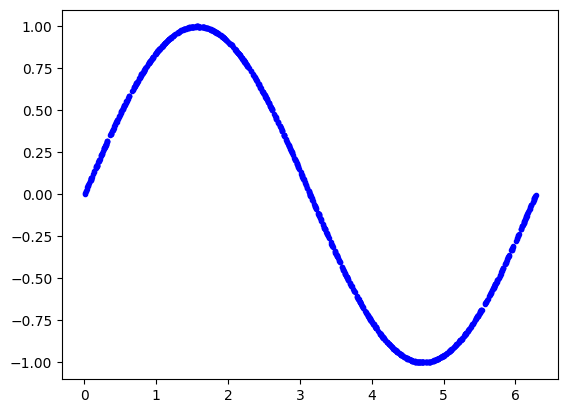

In [ ]:

x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES) #Generación de número aleatorios uniformes
np.random.shuffle(x_values) # Mezcla los números generados anteriormente en un orden diferente
y_values = np.sin(x_values) # Obtiene el seno de cada valor de x
plt.plot(x_values, y_values, 'b.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

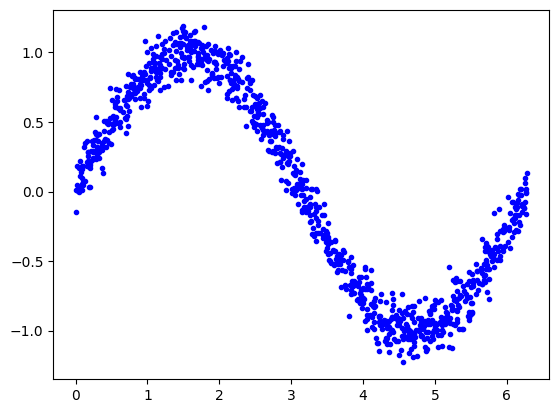

In [ ]:
y_values += 0.1 * np.random.randn(*y_values.shape) #Anañe ruidos a los valores generados anteriormente
plt.plot(x_values, y_values, 'b.')
plt.show

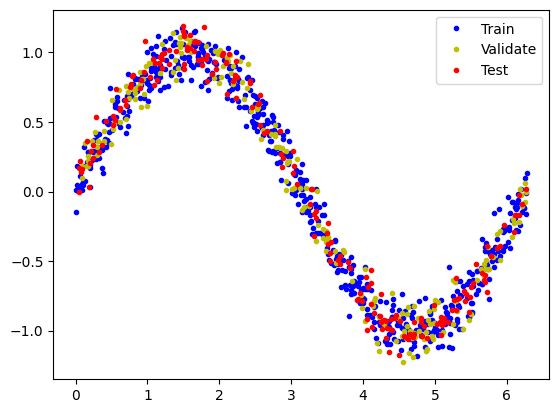

In [ ]:
#Divide los datos en entrenamiento, validación y prueba

TRAIN_SPLIT = int(0.6 * SAMPLES)  #60% para entrenar el modelo
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT) #

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT]) #Divide los datos para X
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT]) # Divide los datos para y

assert (x_train.size + x_validate.size + x_test.size) == SAMPLES #Verifica si la división se realizó correctamente

#Graficas los datos
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [ ]:
#Implementación de la red neuronal
model_1 = tf.keras.Sequential()


In [ ]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,))) #1 capa de entrada (1 entrada)
model_1.add(layers.Dense(1)) # 1 capa de salida
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #Compilación del modelo.
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Entrenamiento del modelo
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4081 - mae: 0.5530 - val_loss: 0.4027 - val_mae: 0.5510
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3652 - mae: 0.5250 - val_loss: 0.3658 - val_mae: 0.5226
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3323 - mae: 0.5011 - val_loss: 0.3330 - val_mae: 0.4968
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3030 - mae: 0.4787 - val_loss: 0.3042 - val_mae: 0.4740
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2774 - mae: 0.4588 - val_loss: 0.2791 - val_mae: 0.4536
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2553 - mae: 0.4420 - val_loss: 0.2576 - val_mae: 0.4368
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2366 - mae: 0.4274 - val_loss: 0.2398 - val_mae: 0.4226
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2213 - mae: 0.4144 - val_loss: 0.2254 - val_mae: 0.4109
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

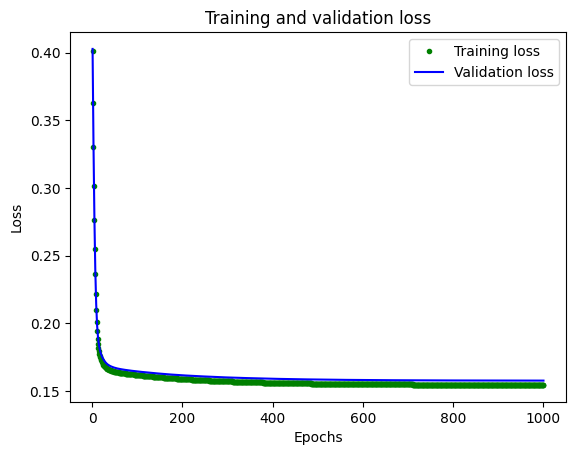

In [ ]:
#Vamos a analizar los valores de pérdida en entrenamiento y validación

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

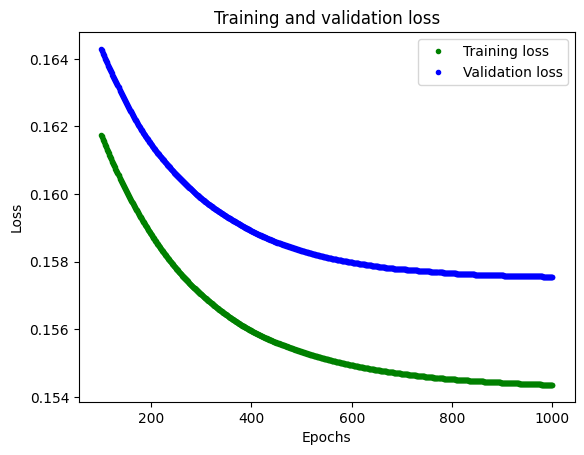

In [ ]:
#Determinar las pérdidas a partir de la epochos=100

SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

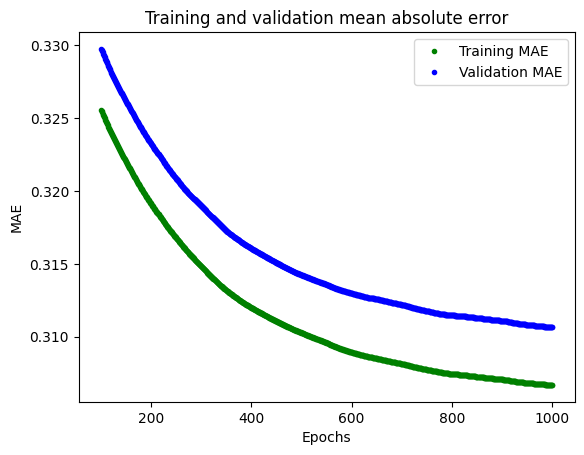

In [ ]:
#Obtiene los valores de MAE (Error Absoluto medio) para entrenamiento y validación

mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


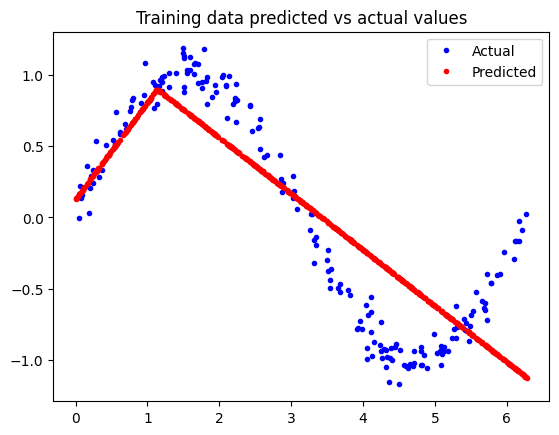

In [ ]:
#Realizar una predicción

predictions = model_1.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
#Creación de un segundo modelo

model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,))) #Una capa de entrada
model_2.add(layers.Dense(16, activation='relu')) # Capa intermedia
model_2.add(layers.Dense(1)) #Capa de salida
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del segundo modelo

history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6801 - mae: 0.7207 - val_loss: 0.4327 - val_mae: 0.5763
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3823 - mae: 0.5383 - val_loss: 0.3567 - val_mae: 0.5142
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3194 - mae: 0.4903 - val_loss: 0.2972 - val_mae: 0.4669
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2677 - mae: 0.4499 - val_loss: 0.2485 - val_mae: 0.4281
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2264 - mae: 0.4172 - val_loss: 0.2121 - val_mae: 0.3988
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1958 - mae: 0.3910 - val_loss: 0.1869 - val_mae: 0.3768
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1746 - mae: 0.3699 - val_loss: 0.1716 - val_mae: 0.3602
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1611 - mae: 0.3541 - val_loss: 0.1605 - val_mae: 0.3470
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.151